In [1]:
from IPython.display import clear_output

In [2]:
!pip install pennylane

clear_output()

In [3]:
from pennylane import numpy as np

In [4]:
import pennylane as qml

# Quantum Circuits

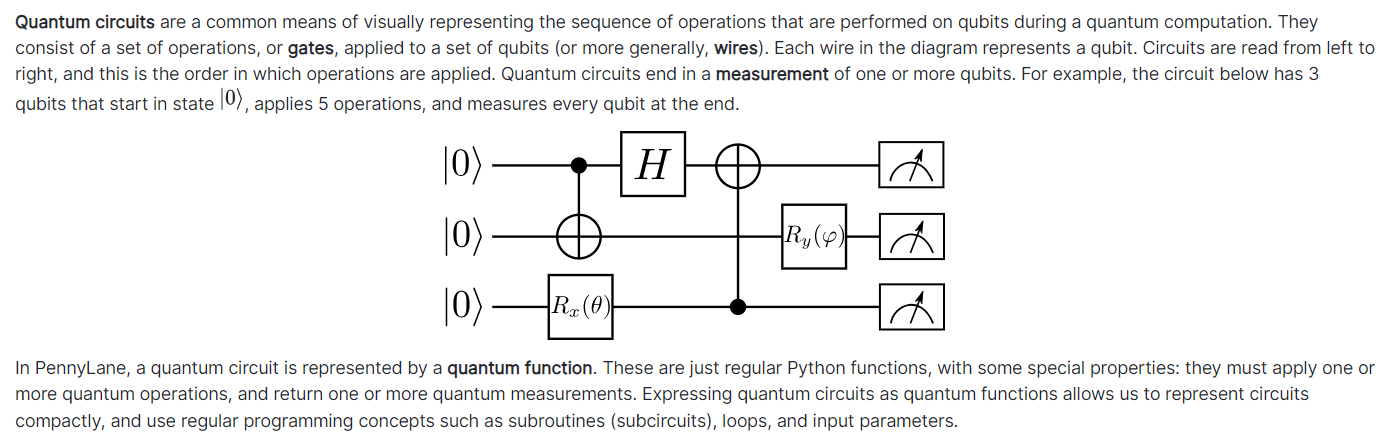

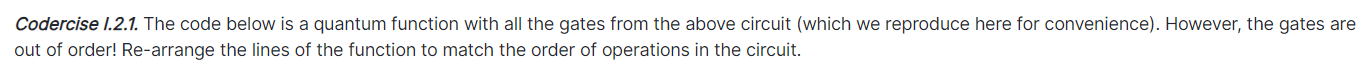

In [ ]:
def my_circuit_1(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])



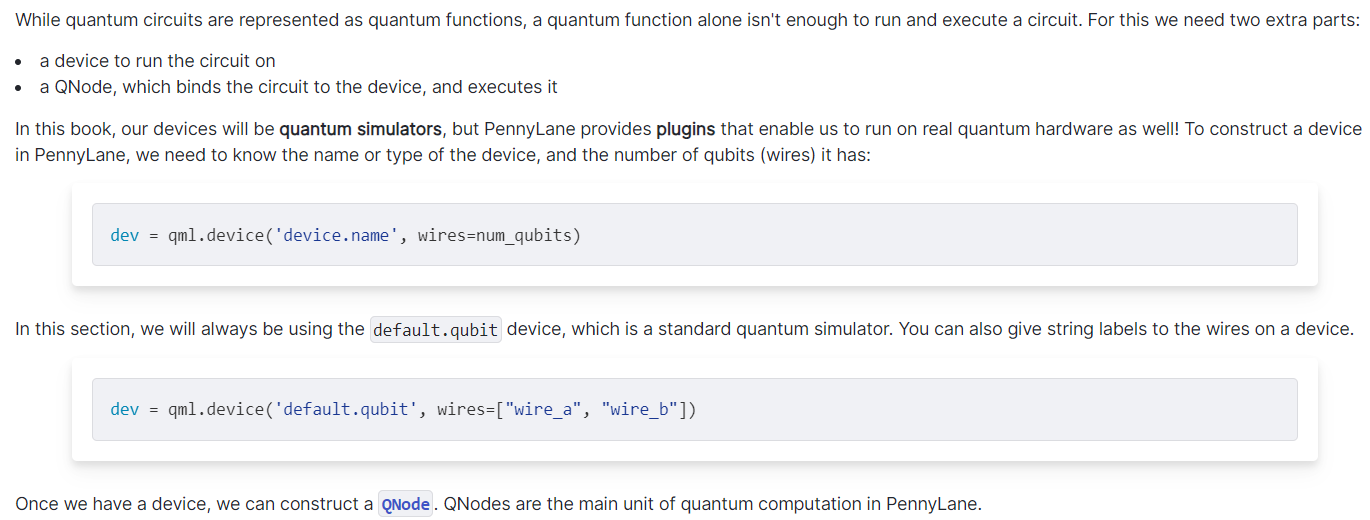

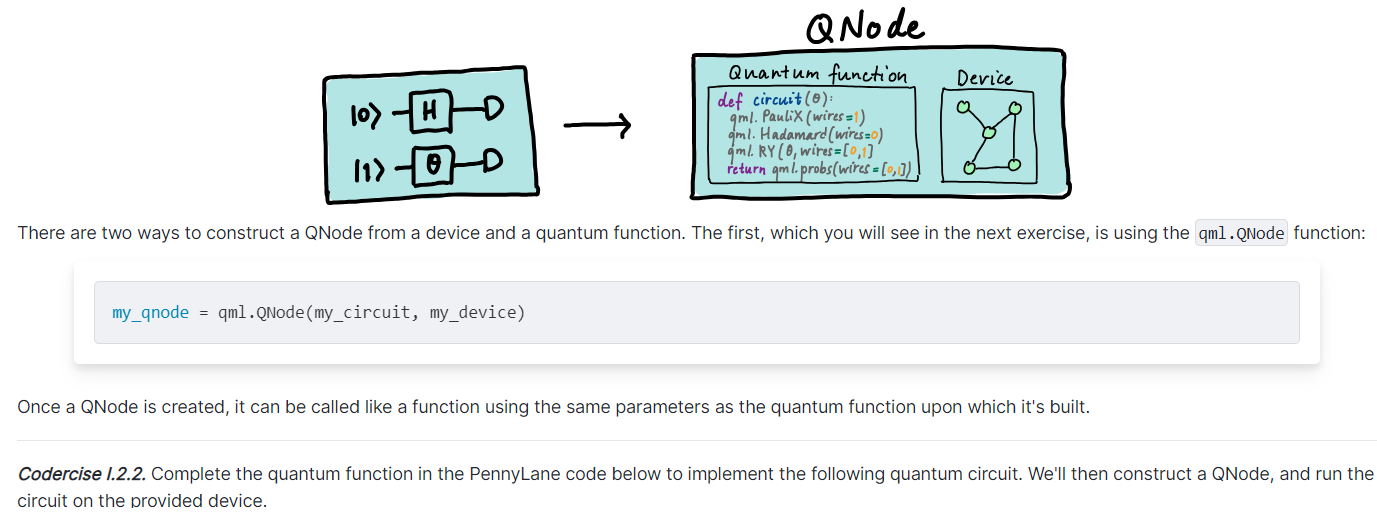

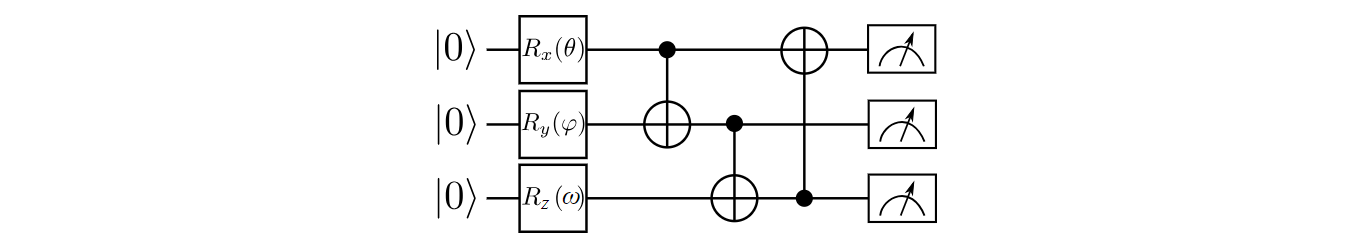

In [5]:
# This creates a device with three wires on which PennyLane can run computations

dev = qml.device("default.qubit", wires=3)

def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])


    return qml.probs(wires=[0, 1, 2])



# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

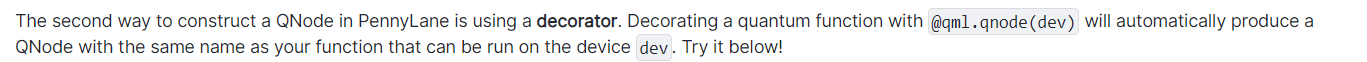

In [ ]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################
@qml.qnode(dev)

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE

def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS


# We can execute the QNode by calling it like we would a regular fuction
my_circuit(theta, phi, omega)




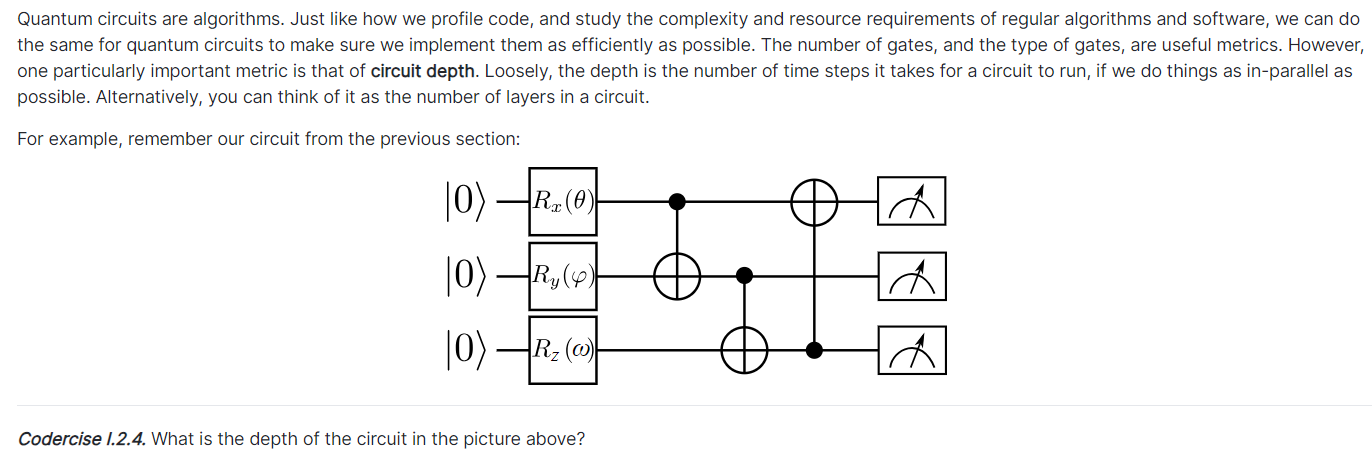

In [ ]:
# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4


# Unitary Matrices

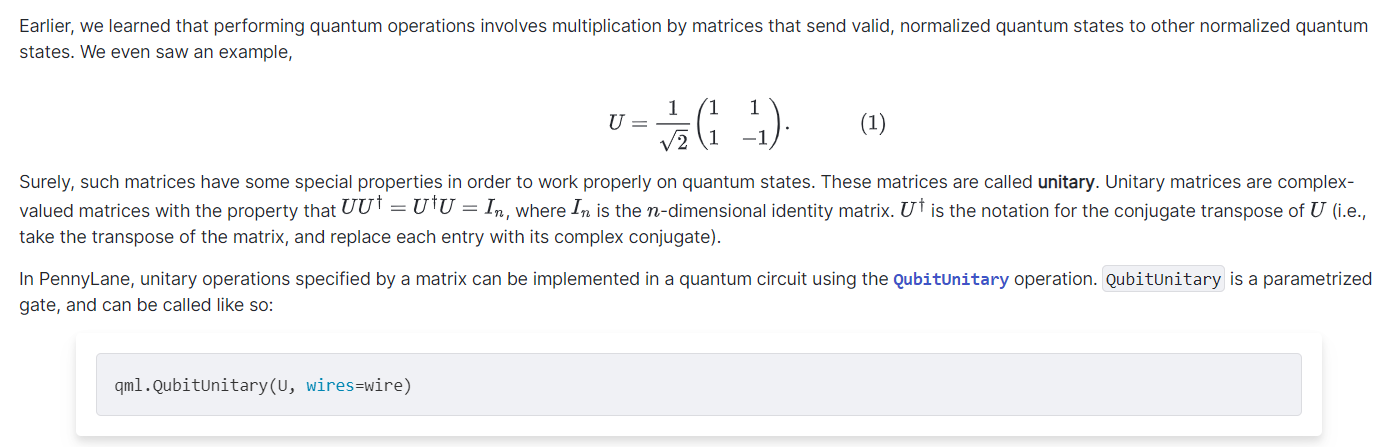

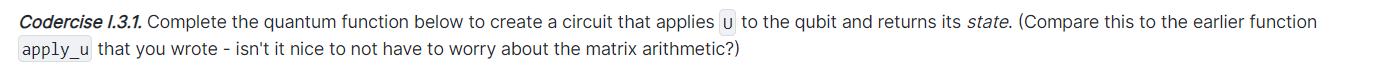

In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    qml.QubitUnitary(U, wires=0)
    # USE QubitUnitary TO APPLY U TO THE QUBIT




    # Return the state
    return qml.state()


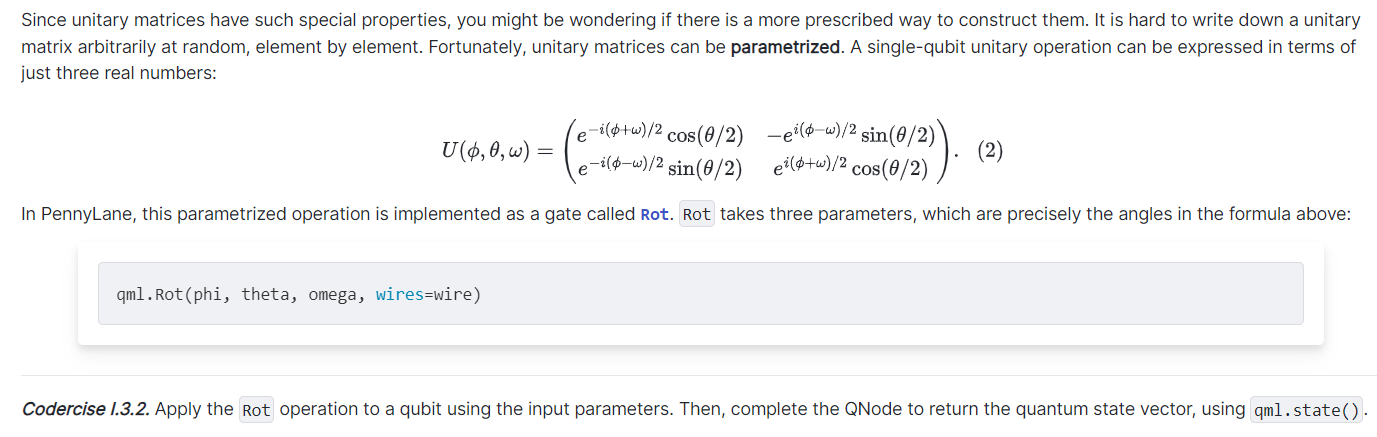

In [7]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega, wires=0)

    # RETURN THE QUANTUM STATE VECTOR
    return qml.state()



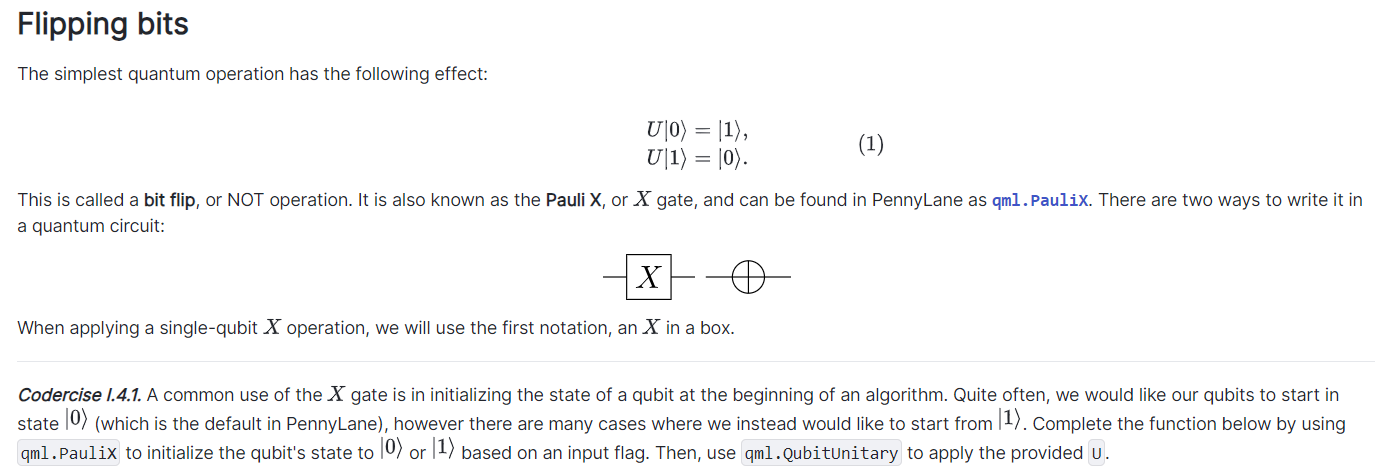

In [8]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER

    if state == 1:
      qml.PauliX(wires=0)

    qml.QubitUnitary(U, wires=0)

    # APPLY U TO THE STATE


    return qml.state()

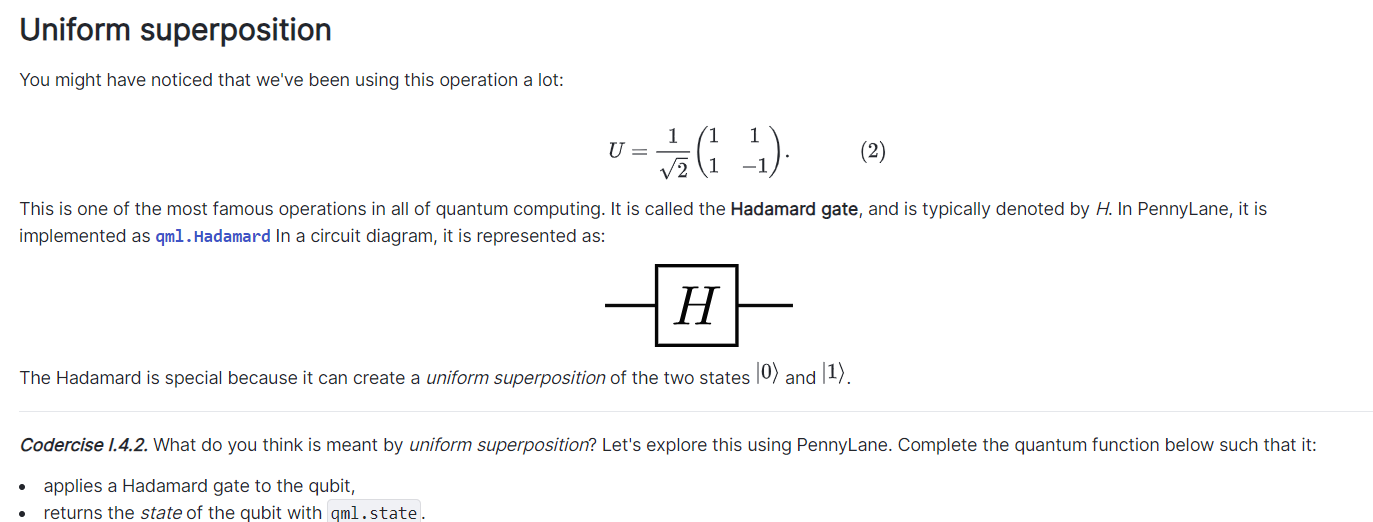

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)

    # RETURN THE STATE
    return qml.state()

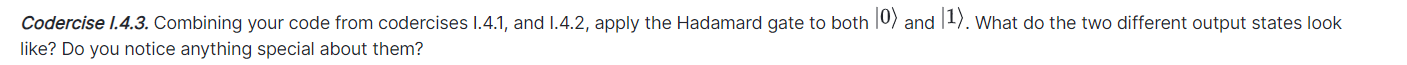

In [11]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state

    # APPLY THE HADAMARD

    # RETURN THE STATE

    if state == 1:
      qml.PauliX(wires=0)

    qml.Hadamard(wires=0)

    return qml.state()

print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


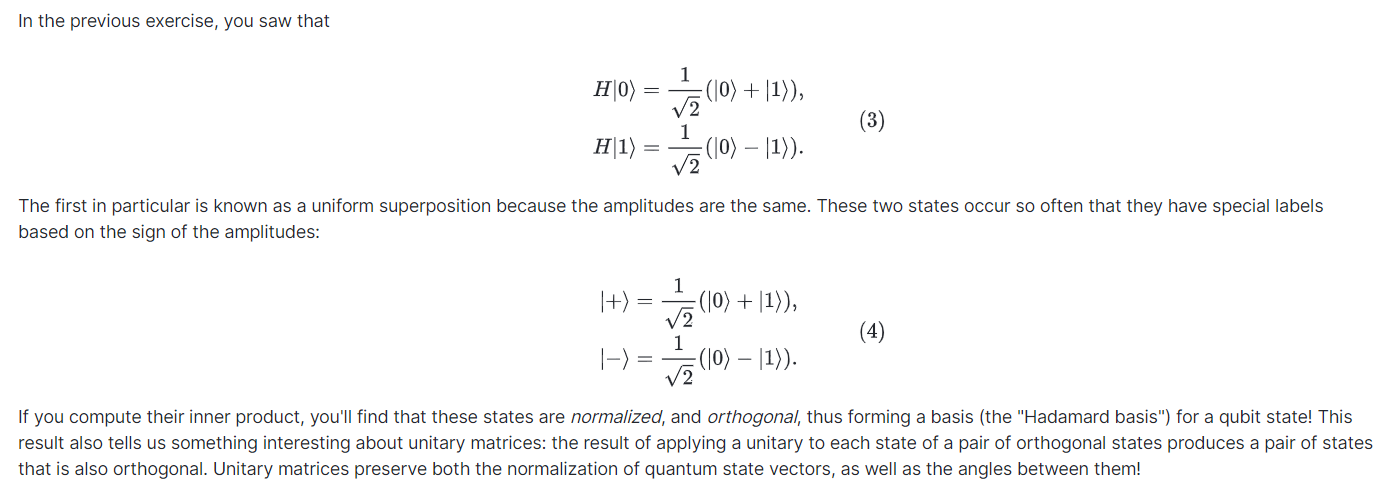

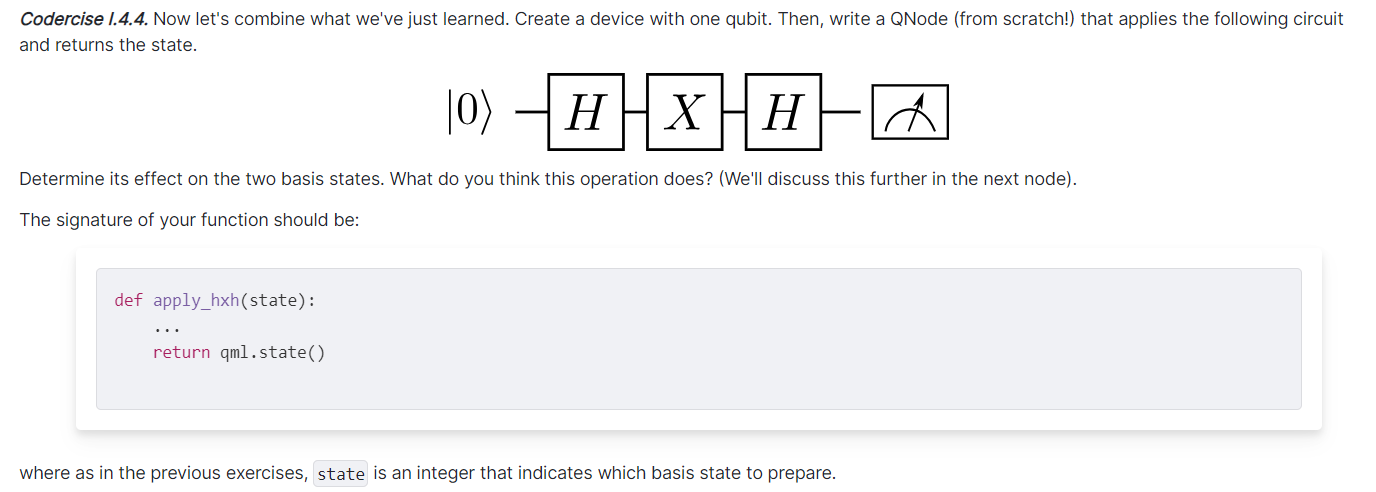

In [15]:
##################
# YOUR CODE HERE #
##################
def apply_hxh(state):

  if state == 1:
    qml.PauliX(wires=0)

  qml.Hadamard(wires=0)
  qml.PauliX(wires=0)
  qml.Hadamard(wires=0)

  return qml.state()

# CREATE A DEVICE

# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE

# Print your results
print(apply_hxh(0))
print(apply_hxh(1))


state(wires=[])
state(wires=[])


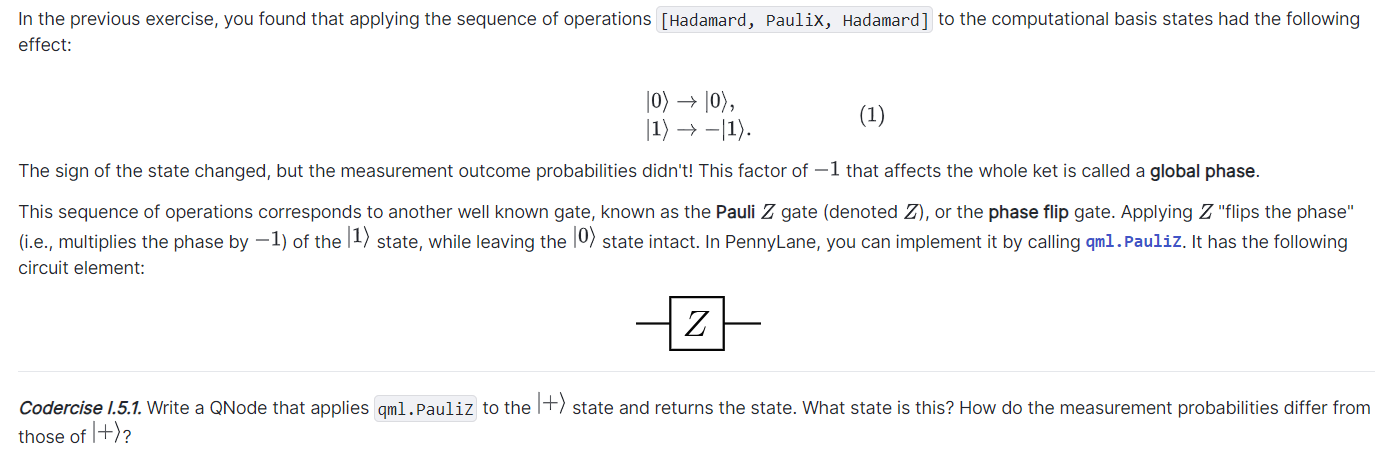

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE

    # APPLY PAULI Z

    # RETURN THE STATE
    return

print(apply_z_to_plus())


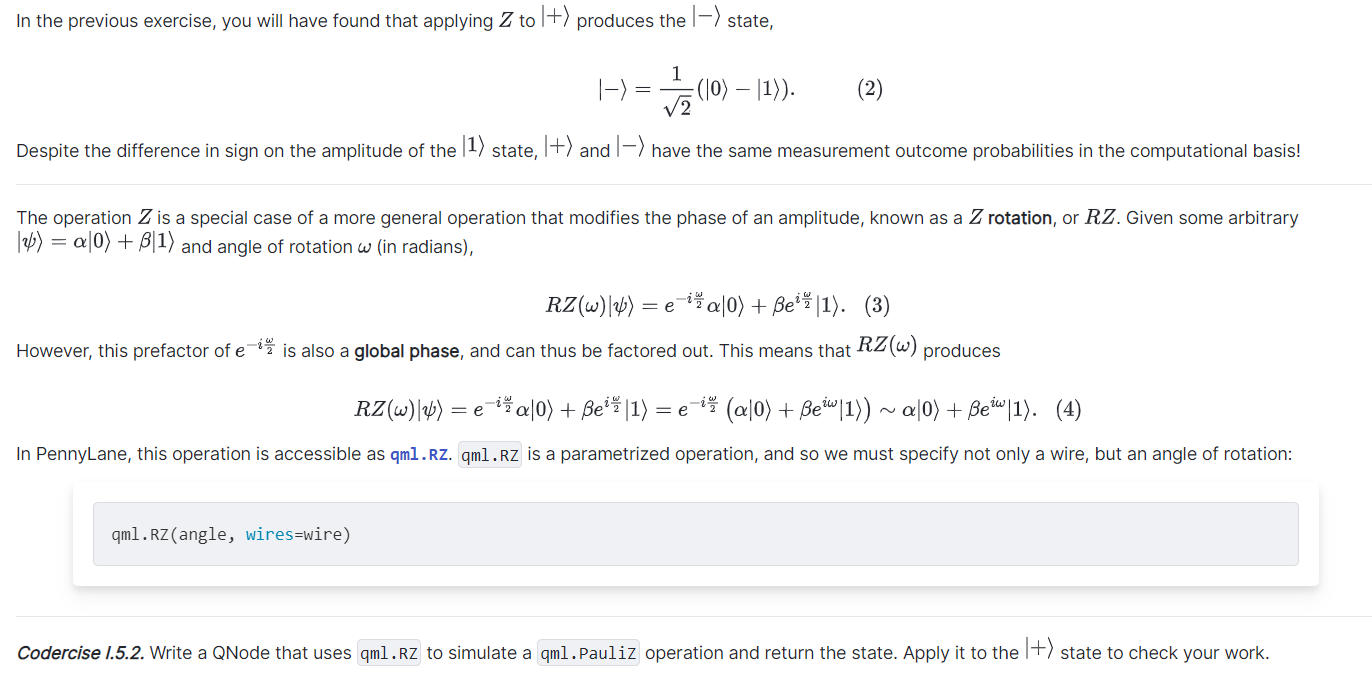

In [16]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    # CREATE THE |+> STATE
    qml.Hadamard(wires = 0)

    # APPLY RZ (remember to ignore global phase)
    qml.RZ(np.pi, wires = 0)

    # RETURN THE STATE
    return qml.state()


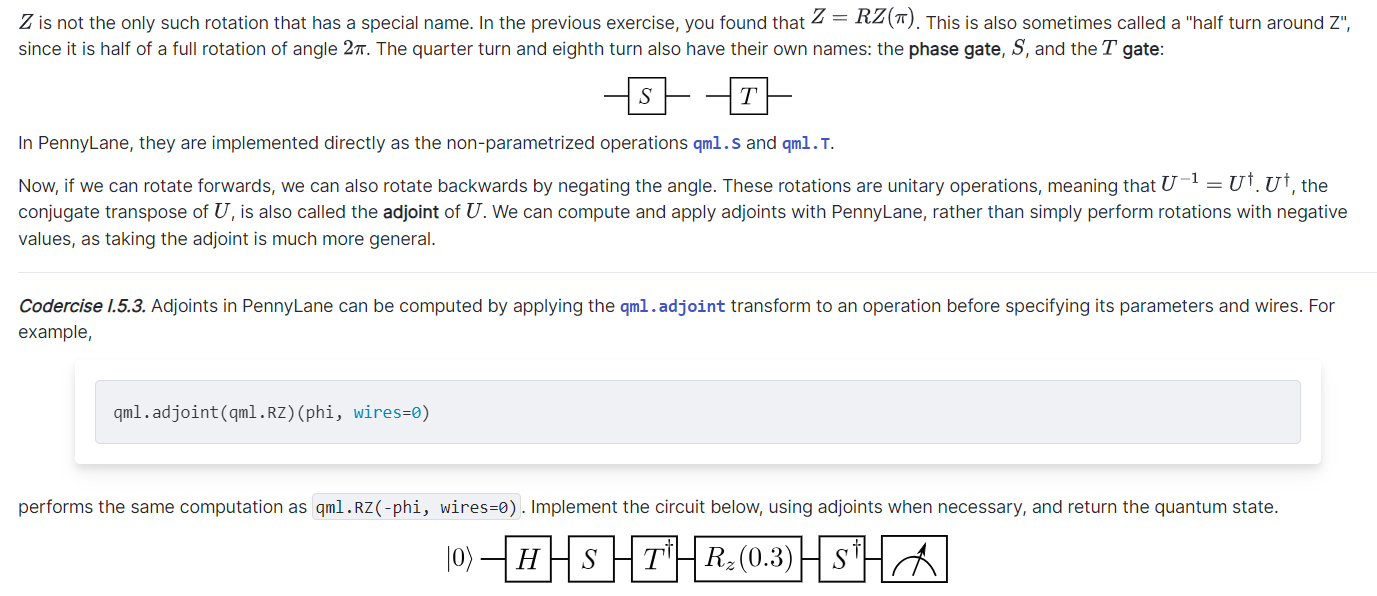

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT

    # RETURN THE STATE

    return


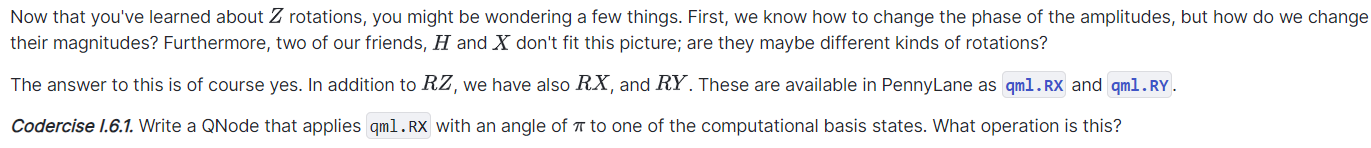

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE

    return

print(apply_rx_pi(0))
print(apply_rx_pi(1))


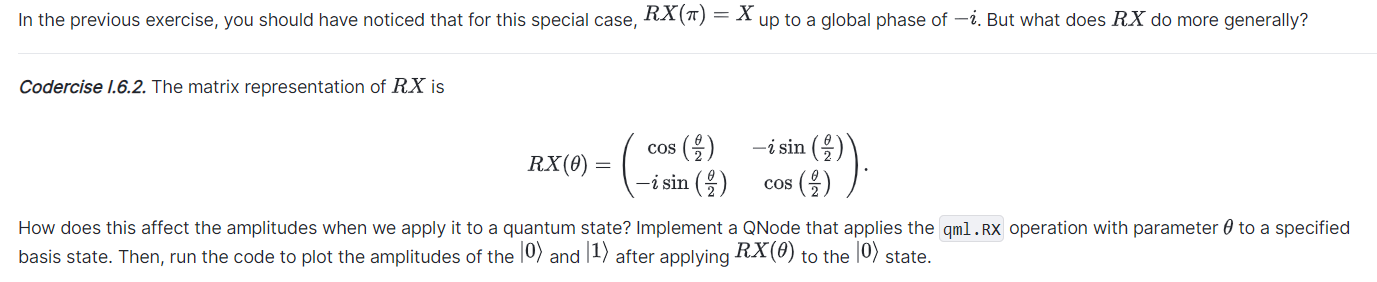

In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE

    return

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

#plot = plotter(angles, output_states)


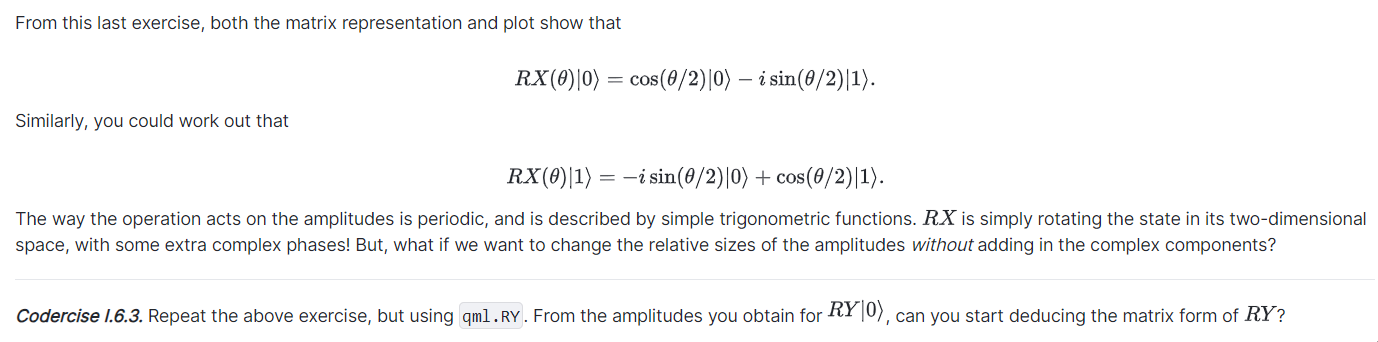

In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    return qml.state()

    return

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

#plot = plotter(angles, output_states)

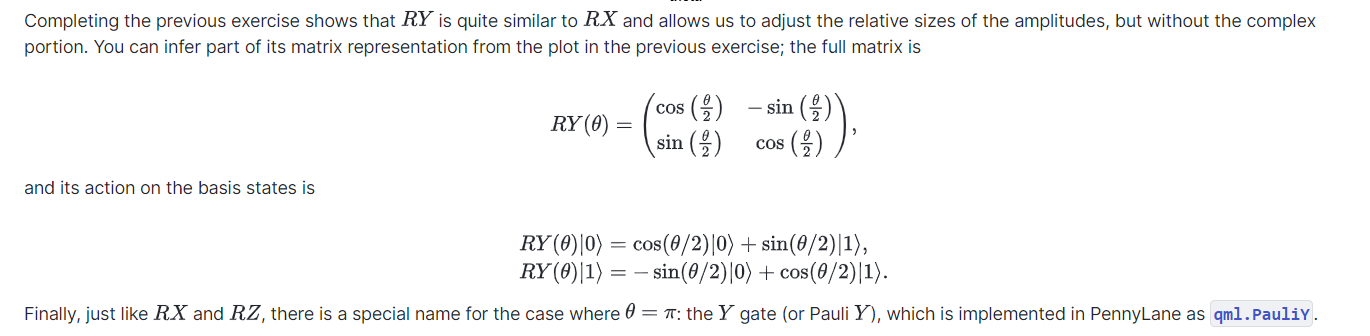